# Plot calendar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
paletteStatus = {
    'C':'#d15e56',
    'B':'#d18556',
    'A':'#d1a856',
}

In [3]:
## Full en entry for each day
## or loop the entries to create the entry if the day not exist in log: [3, 'A'],[5, 'C']- > add [4, 'A']

data = [
    ['task-0000', 1, [ [0, 'A'],[2, 'B'],[2, 'A'] ]],
    ['task-0001', 1, [ [0, 'A'],[2, 'B'],[2, 'A'],[3, 'B'],[4, 'C']]],
    ['task-0002', 2, [ [8, 'A'],[8, 'B'],[9, 'C']] ],
    ['task-0003', 1, [ [1, 'A'],[2, 'B'],[2, 'A'],[2, 'C'],[2, 'B'],[2, 'A'],[3, 'C'],[4, 'C'],[5, 'C'] ]],
] 

In [4]:
dfData = []
for dataItem in data:
    taskId = dataItem[0]
    taskSp = dataItem[1]
    for idx, statusLog in enumerate(dataItem[2]):
        day = statusLog[0]
        status = statusLog[1]
        dfData.append([taskId, taskSp, day, status])

dfData = pd.DataFrame(dfData, columns=['taskId', 'sp', 'day', 'status']) 
dfData.head()

,taskId,sp,day,status
0,task-0000,1,0,A
1,task-0000,1,2,B
2,task-0000,1,2,A
3,task-0001,1,0,A
4,task-0001,1,2,B


In [5]:
dfMod1 = dfData

dfMod1['_index'] = dfMod1.index
dfMod1['_plt_x_origin'] = dfMod1.day.astype('float') 
dfMod1['_plt_x_inc'] = dfMod1.groupby(['day','taskId']).cumcount()
dfMod1['_division'] =  1/dfMod1.groupby(['day','taskId'])['day'].transform('count').astype('int')
dfMod1['_size'] = 1


In [6]:

row_iterator = dfMod1.iterrows()
_, lastRow  =  next(row_iterator)

for idx, row in row_iterator:
    if( row['taskId'] == lastRow['taskId'] ):
        difDays = row.day - lastRow.day
        if( difDays > 1 ):
            dfMod1.iloc[ idx-1, dfMod1.columns.get_loc('_size')] = difDays
    lastRow = row

dfMod1

,taskId,sp,day,status,_index,_plt_x_origin,_plt_x_inc,_division,_size
0,task-0000,1,0,A,0,0.0,0,1.0,2
1,task-0000,1,2,B,1,2.0,0,0.5,1
2,task-0000,1,2,A,2,2.0,1,0.5,1
3,task-0001,1,0,A,3,0.0,0,1.0,2
4,task-0001,1,2,B,4,2.0,0,0.5,1
5,task-0001,1,2,A,5,2.0,1,0.5,1
6,task-0001,1,3,B,6,3.0,0,1.0,1
7,task-0001,1,4,C,7,4.0,0,1.0,1
8,task-0002,2,8,A,8,8.0,0,0.5,1
9,task-0002,2,8,B,9,8.0,1,0.5,1


## Plot

In [7]:
plotDf = dfMod1

In [8]:
## Legends
legends = []
for key, value in paletteStatus.items():
    patch = mpatches.Patch(color=value, label=key)
    legends.append(patch)

In [9]:
## Assign data columns to plot:axis, labels, etc...
_y = plotDf.taskId
_x = plotDf._plt_x_origin + (plotDf._plt_x_inc * plotDf._division)
_yLabelAgg = plotDf.sp
_size = plotDf._size * plotDf._division
_colors = plotDf.status.apply(lambda x: paletteStatus[x])
_labels = plotDf.status

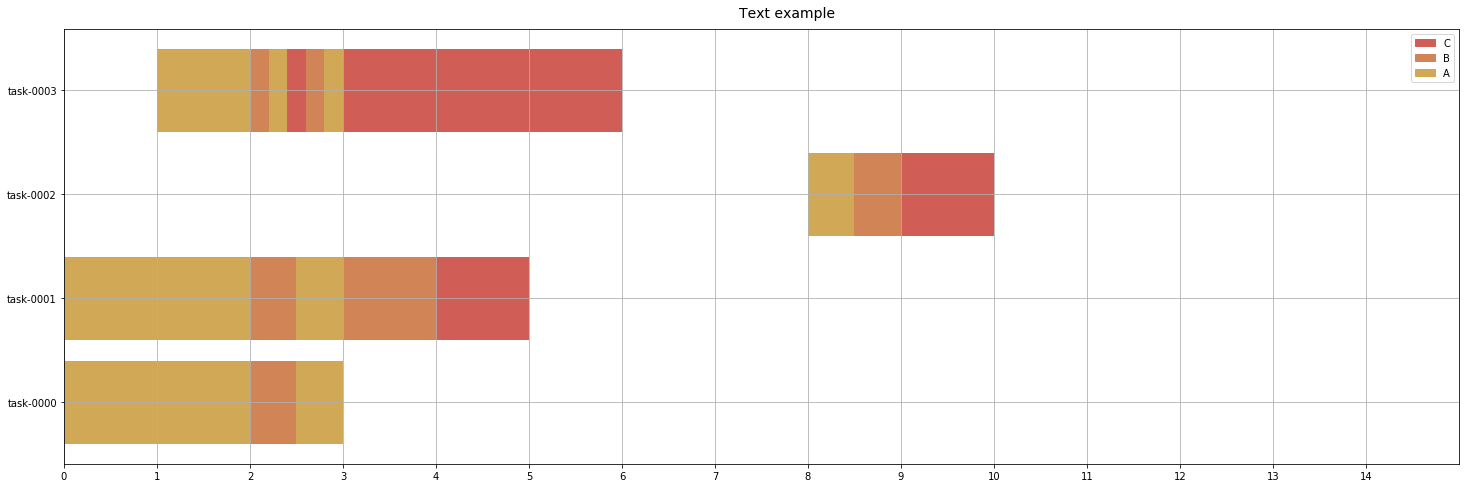

In [10]:
## Figure
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)

plt.draw() ## Important to ticks
fig.text(0.5, 0.9, f'Text example', fontsize=14)

ax.set_xlim(0, 15) # X axis range values
plt.xticks(np.arange(0, 15, 1))

## Draw bars
for i,a in enumerate(_x):
    ax.barh( y=_y[i], width=_size[i], left=_x[i], color=_colors[i], zorder=-1)

## Legends
ax.legend(handles=legends)

plt.grid()
plt.show()
# fig.savefig(reportFullPath)

# Notes

In [11]:
# def calculateSize( logs, currentLogIdx):
#     # cases: 
#     # [ [2, 'A'], [2, 'B'], [2, 'A'], [3, 'D']]
#     # [ [2, 'B'], [2, 'C'], [2, 'B']]
#     # [ [2, 'B'], [4, 'C']]
   
#     if( currentLogIdx == len(logs)-1 ):
#         size = 1
#     else:
#         currentLog = logs[currentLogIdx] 
#         samePointerList = [ log for log in logs if log[0] == logs[currentLogIdx][0] ]
#         steps = len(samePointerList)
#         if(currentLogIdx + steps == len(logs)):
#             size = 1/steps
#         else:
#             nextLog = logs[currentLogIdx + steps]
#             size = (nextLog[0] - currentLog[0]) / steps 
#     return size


# calculateSize( [[0, 'A'],[2, 'B'],[2, 'A'],[3, 'B'],[4, 'C']] , 1)